# Nama : William Cahyadi
# NIM    : 2201730135

In [1]:
import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('dataset.csv')

In [2]:
data.columns

Index(['id', 'host_id', 'host_name', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating', 'reviews_per_month',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 5

In [3]:
# hilangkan column yang tidak memiliki nama
data.drop(data.columns[30:91],axis=1,inplace = True)

In [4]:
data

,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,NaN,NaN,NaN,Shibuya District,3,3,Shibuya District,...,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,...,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,NaN,NaN,NaN,NaN,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,NaN,NaN
13045,43260684,191971770,Hostel,NaN,NaN,NaN,NaN,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,NaN,NaN
13046,43272924,335257890,Blue,within an hour,100%,100%,NaN,0,0,Shinjuku District,...,28,30,28,28,1125,1125,0,0,NaN,NaN
13047,43281694,333948576,Kido,NaN,NaN,NaN,NaN,0,0,Shibuya District,...,1,90,1,1,90,90,0,0,NaN,NaN


In [5]:
# lihat jumlah data yang kosong
data.isnull().sum()

id                              0
host_id                       238
host_name                      46
host_response_time            850
host_response_rate            803
host_acceptance_rate          320
host_neighbourhood           1815
host_listings_count            53
host_total_listings_count      21
neighbourhood                1188
neighbourhood_cleansed         30
property_type                   1
room_type                       4
accommodates                    3
bathrooms                       5
bedrooms                       21
beds                           34
price                         202
guests_included                52
extra_people                   22
minimum_nights                 29
maximum_nights                 29
minimum_minimum_nights         33
maximum_minimum_nights          9
minimum_maximum_nights         24
maximum_maximum_nights         23
number_of_reviews               0
number_of_reviews_ltm           0
review_scores_rating         1974
reviews_per_mo

In [6]:
# drop row yang memiliki null - value (NaN)
data.dropna(inplace = True)
data = data.reset_index(drop = True)
data.count()

id                           8577
host_id                      8577
host_name                    8577
host_response_time           8577
host_response_rate           8577
host_acceptance_rate         8577
host_neighbourhood           8577
host_listings_count          8577
host_total_listings_count    8577
neighbourhood                8577
neighbourhood_cleansed       8577
property_type                8577
room_type                    8577
accommodates                 8577
bathrooms                    8577
bedrooms                     8577
beds                         8577
price                        8577
guests_included              8577
extra_people                 8577
minimum_nights               8577
maximum_nights               8577
minimum_minimum_nights       8577
maximum_minimum_nights       8577
minimum_maximum_nights       8577
maximum_maximum_nights       8577
number_of_reviews            8577
number_of_reviews_ltm        8577
review_scores_rating         8577
reviews_per_mo

In [7]:
columns = data.columns.tolist()

In [8]:
columns

['id',
 'host_id',
 'host_name',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'reviews_per_month']

In [9]:
features = [
 'host_response_time',
 'host_response_rate',
 'neighbourhood',
 'property_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews'
]

In [10]:
data['host_response_time'].unique()

array(['within a few hours', 'within a day', 'within an hour',
       'a few days or more', 'Sumida, Tokyo, Japan', 'Tokyo, Japan',
       'Shinjuku, Tokyo, Japan', 'Nakano, Tokyo, Japan',
       'Chuo City, Tokyo, Japan', 'Zhengzhou, Henan, China', 'JP',
       'tokyo', 'Shibuya, Tokyo, Japan', 'Tokyo, Tokyo, Japan', 'Japan'],
      dtype=object)

In [11]:
data['price'].unique()

array(['$11,048.00', '$4,171.00', '$6,952.00', '$3,957.00', '$8,045.00',
       '$5,149.00', '$3,530.00', '$10,726.00', '$31,980.00', '$5,990.00',
       '$13,049.00', '$28,023.00', '$25,028.00', '$3,209.00', '$2,145.00',
       '$13,477.00', '$6,007.00', '$3,969.00', '$3,325.00', '$3,637.00',
       '$12,871.00', '$12,979.00', '$8,581.00', '$3,316.00', '$14,974.00',
       '$69,522.00', '$80,004.00', '$10,910.00', '$16,471.00',
       '$26,953.00', '$2,460.00', '$9,439.00', '$5,470.00', '$18,985.00',
       '$25,991.00', '$2,467.00', '$10,512.00', '$5,455.00', '$5,134.00',
       '$8,022.00', '$6,845.00', '$31,018.00', '$5,348.00', '$7,701.00',
       '$13,193.00', '$8,450.00', '$10,404.00', '$11,979.00',
       '$17,006.00', '$15,017.00', '$3,850.00', '$9,519.00', '$16,044.00',
       '$9,947.00', '$49,984.00', '$7,508.00', '$5,776.00', '$4,385.00',
       '$6,543.00', '$4,505.00', '$25,743.00', '$4,827.00', '$10,190.00',
       '$3,218.00', '$3,861.00', '$34,868.00', '$33,680.00', '

In [12]:
data['review_scores_rating'].unique()

array(['95', '96', '90', '99', '91', '98', '94', '93', '97', '100', '88',
       '87', '92', '86', '89', '85', '75', '73', '82', '84', '81', '83',
       '76', '77', '80', '2016-12-08', '2016-12-17', '2016-12-09', '74',
       '70', '60', '68', '67', '79', '53', '78', '2018-06-30',
       '2018-04-02', '2019-04-25', '64', '2019-11-23', '2018-01-01', '72',
       '2018-07-10', '2018-07-03', '2018-07-06', '2018-07-17', '65', '71',
       '2018-09-09', '2018-09-10', '66', '2018-11-08', '69', '2019-01-13',
       '50', '2019-01-02', '2019-02-15', '20', '2019-04-02', '63', '62',
       '40', '2019-06-29', '57', '2019-10-06', '30', '2019-10-13', '55',
       '2019-12-29', '2020-03-09', '2020-02-03', '2020-03-29'],
      dtype=object)

# Clean Target Data (price and review_scores_rating data)

Bersihkan data price karena dalam data price terdapat data dalam format JSON.

In [13]:
# price
price_pattern = "^[$]"
for i,x in enumerate(data['price']):
    match = re.search(price_pattern,x)
    data.at[i,'price'] = x.replace('$','').replace(',','')
    if (not match):
        data.drop(i, axis = 0, inplace = True)
data = data.reset_index(drop = True)
data['price'] = data['price'].astype(float)

In [14]:
data['price'].unique()

array([ 11048.,   4171.,   6952.,   3957.,   8045.,   5149.,   3530.,
        10726.,  31980.,   5990.,  13049.,  28023.,  25028.,   3209.,
         2145.,  13477.,   6007.,   3969.,   3325.,   3637.,  12871.,
        12979.,   8581.,   3316.,  14974.,  69522.,  80004.,  10910.,
        16471.,  26953.,   2460.,   9439.,   5470.,  18985.,  25991.,
         2467.,  10512.,   5455.,   5134.,   8022.,   6845.,  31018.,
         5348.,   7701.,  13193.,   8450.,  10404.,  11979.,  17006.,
        15017.,   3850.,   9519.,  16044.,   9947.,  49984.,   7508.,
         5776.,   4385.,   6543.,   4505.,  25743.,   4827.,  10190.,
         3218.,   3861.,  34868.,  33680.,   9626.,   9975.,   6524.,
         9010.,  15982.,  16196.,   2353.,   4813.,   6972.,   2896.,
        20001.,   5241.,   5041.,   2032.,  14011.,  16518.,   2994.,
        24992.,   9546.,   7723.,  17969.,  23958.,  30033.,   6865.,
        34967.,   4064.,   6757.,   1497.,  10619.,  31964.,  16947.,
         7487.,   50

Bersihkan data review_scores_rating karena ada data tanggal pada data tersebut

In [15]:
review_scores_rating_pattern = "^[0-9]{1,3}$"
for i,x in enumerate(data['review_scores_rating']):
    match = re.search(review_scores_rating_pattern,x)
    if (not match):
        data.drop(i, axis = 0, inplace = True)
data = data.reset_index(drop = True)
data['review_scores_rating'] = data['review_scores_rating'].astype(int)

In [16]:
data['review_scores_rating'].unique()

array([ 95,  96,  90,  99,  91,  98,  94,  93,  97, 100,  88,  87,  92,
        86,  89,  85,  75,  73,  82,  84,  81,  83,  76,  77,  80,  74,
        70,  60,  68,  67,  79,  53,  78,  64,  72,  65,  71,  66,  69,
        50,  20,  63,  62,  40,  57,  30,  55])

# Data Cleaning (Data Independen)

In [17]:
numerical = ['host_response_rate','accommodates','bathrooms','bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [18]:
categorical = [ 'host_response_time', 'neighbourhood',
 'property_type']

## Categorical data

In [19]:
from sklearn import preprocessing

### 1. host_response_time

In [20]:
data['host_response_time'].unique().tolist()

['within a few hours', 'within a day', 'within an hour', 'a few days or more']

Kita perlu mengencode label-label tersebut menjadi angka

In [21]:
le = preprocessing.LabelEncoder()

data[['host_response_time']] = le.fit_transform(data['host_response_time'])

In [22]:
data['host_response_time'].unique()

array([2, 1, 3, 0])

### 2. neighbourhood

In [23]:
data['neighbourhood'].unique()

array(['Sumida District', 'Nerima District', 'Setagaya District',
       'Shinjuku District', 'Shimokitazawa', 'Adachi District',
       'Shibuya District', 'Katsushika District', 'Meguro District',
       'Toshima District', 'Minato District', 'Suginami District',
       'Bunkyo District', 'Taito District', 'Itabashi District',
       'Asakusa/Ueno', 'Edogawa District', 'Arakawa District',
       'Kita District', 'Nakano District', 'Akasaka', 'Nakameguro',
       'Shibuya', 'Chiyoda District', 'Chūō District', 'Shinjuku',
       'Ikebukuro', 'Aoyama', 'Tsukishima', 'Tsukiji', 'Ebisu/Daikanyama',
       'Roppongi', 'Ginza', 'Harajuku', 'Akihabara', 'Roppongi Hills'],
      dtype=object)

In [24]:
le = preprocessing.LabelEncoder()
data['neighbourhood'] = le.fit_transform(data['neighbourhood'])

Kita perlu mengencode label-label tersebut menjadi angka

In [25]:
data['neighbourhood'].unique()

array([31, 21, 24, 29, 27,  0, 26, 15, 17, 33, 18, 30,  6, 32, 14,  5, 10,
        4, 16, 20,  1, 19, 25,  7,  8, 28, 13,  3, 35, 34,  9, 22, 11, 12,
        2, 23])

### 3. property_type

In [26]:
data['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Hut', 'Tiny house',
       'Townhouse', 'Aparthotel', 'Loft', 'Hostel', 'Guesthouse',
       'Guest suite', 'Cabin', 'Serviced apartment', 'Villa',
       'Boutique hotel', 'Ryokan (Japan)', 'Hotel', 'Dorm', 'Camper/RV',
       'Bungalow', 'Bed and breakfast', 'Dome house', 'Tent', 'Cottage'],
      dtype=object)

In [27]:
le = preprocessing.LabelEncoder()
data['property_type'] = le.fit_transform(data['property_type'])

In [28]:
data['property_type'].unique()

array([ 1, 15,  7, 16, 21, 22,  0, 17, 13, 12, 11,  5, 19, 23,  3, 18, 14,
       10,  6,  4,  2,  9, 20,  8])

## Numerical data

Bersihkan data yang seharusnya numerikal dengan cara menghilangkan simbol-simbol seperti '$', ',' , '%'

In [29]:
for x in numerical:
    for i,j in enumerate(data[x]):
        data.at[i,x] = j.replace('$','').replace(',','').replace('%','')

In [30]:
for x in numerical:
    if x=='extra_people' or x=='bathrooms':
        data[x] = data[x].astype(float)
    else:
        data[x] = data[x].astype(int)

In [31]:
data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8550 entries, 0 to 8549
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   host_response_time  8550 non-null   int32  
 1   host_response_rate  8550 non-null   int32  
 2   neighbourhood       8550 non-null   int32  
 3   property_type       8550 non-null   int32  
 4   accommodates        8550 non-null   int32  
 5   bathrooms           8550 non-null   float64
 6   bedrooms            8550 non-null   int32  
 7   beds                8550 non-null   int32  
 8   extra_people        8550 non-null   float64
 9   minimum_nights      8550 non-null   int32  
 10  maximum_nights      8550 non-null   int32  
 11  number_of_reviews   8550 non-null   int32  
dtypes: float64(2), int32(10)
memory usage: 467.7 KB


In [32]:
price = data['price']
review_scores_rating = data['review_scores_rating']

In [33]:
for x in columns:
    if x in numerical or x in categorical:
        continue
    else:
        data.drop(x, axis=1,inplace=True)

In [34]:
columns = data.columns

In [35]:
columns

Index(['host_response_time', 'host_response_rate', 'neighbourhood',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews'],
      dtype='object')

In [36]:
columns = data.columns
data.insert(len(columns),'review_scores_rating',review_scores_rating)

In [37]:
columns = data.columns

In [38]:
data

,host_response_time,host_response_rate,neighbourhood,property_type,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,2,100,31,1,2,1.0,1,2,0.0,3,365,165,95
1,2,100,21,1,2,1.0,1,1,1070.0,28,180,113,95
2,1,100,24,1,2,1.0,0,1,0.0,28,720,103,95
3,2,100,21,1,2,1.0,1,1,1070.0,28,180,103,96
4,1,100,24,15,3,1.0,2,2,550.0,28,720,44,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,3,100,5,1,9,1.5,3,5,1000.0,2,1125,1,100
8546,3,100,5,1,7,1.5,3,4,1000.0,2,1125,2,100
8547,3,100,32,1,7,1.5,2,4,1000.0,2,1125,1,100
8548,3,100,29,1,6,1.5,2,3,1000.0,1,1125,1,100


# Feature Engineering untuk data yang akan digunakan untuk melakukan klasifikasi review_scores_rating

In [39]:
data

,host_response_time,host_response_rate,neighbourhood,property_type,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,2,100,31,1,2,1.0,1,2,0.0,3,365,165,95
1,2,100,21,1,2,1.0,1,1,1070.0,28,180,113,95
2,1,100,24,1,2,1.0,0,1,0.0,28,720,103,95
3,2,100,21,1,2,1.0,1,1,1070.0,28,180,103,96
4,1,100,24,15,3,1.0,2,2,550.0,28,720,44,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,3,100,5,1,9,1.5,3,5,1000.0,2,1125,1,100
8546,3,100,5,1,7,1.5,3,4,1000.0,2,1125,2,100
8547,3,100,32,1,7,1.5,2,4,1000.0,2,1125,1,100
8548,3,100,29,1,6,1.5,2,3,1000.0,1,1125,1,100


In [40]:
data_for_review_scores_rating = data

In [41]:
review_scores_rating.max()

100

In [42]:
review_scores_rating.min()

20

In [43]:
data['review_scores_rating'].describe()

count    8550.000000
mean       92.693801
std         7.484677
min        20.000000
25%        90.000000
50%        95.000000
75%        98.000000
max       100.000000
Name: review_scores_rating, dtype: float64

Dari code: data ['review_scores_rating'].describe() kita bisa melihat bahwa review_score_rating 90 hanya ad pada quartile ke dua dan median dari review_score_rating adalah 95 dan meannya 92, . Dari data tersebut, kita dapat tahu bahwa mendapatkan review_rating dibawah 90 merupakan hal yang bisa dibilang biasa karena nilai yang dibawah 90 hanya 25%. 

Jadi kita akan map review_score menjadi :

biasa/buruk : 0 - 85, bagus: 86 - 100

In [44]:
for i,x in enumerate(data['review_scores_rating']):
    if x>=0 and x<=85:
        data.at[i,'review_scores_rating'] = 0
    else:
        data.at[i,'review_scores_rating'] = 1

In [45]:
count_category = pd.value_counts(data['review_scores_rating'],sort = True)
print(count_category)

1    7421
0    1129
Name: review_scores_rating, dtype: int64


Bisa dilihat bahwa class tidak terdistribusi dengan rata atau bisa dibilang imbalanced. Untuk membuat data menjadi balanced sehingga bisa di learn maka perlu dilakukan oversampling dan undersampling.

### Scaling

In [46]:
numerical

['host_response_rate',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [47]:
categorical

['host_response_time', 'neighbourhood', 'property_type']

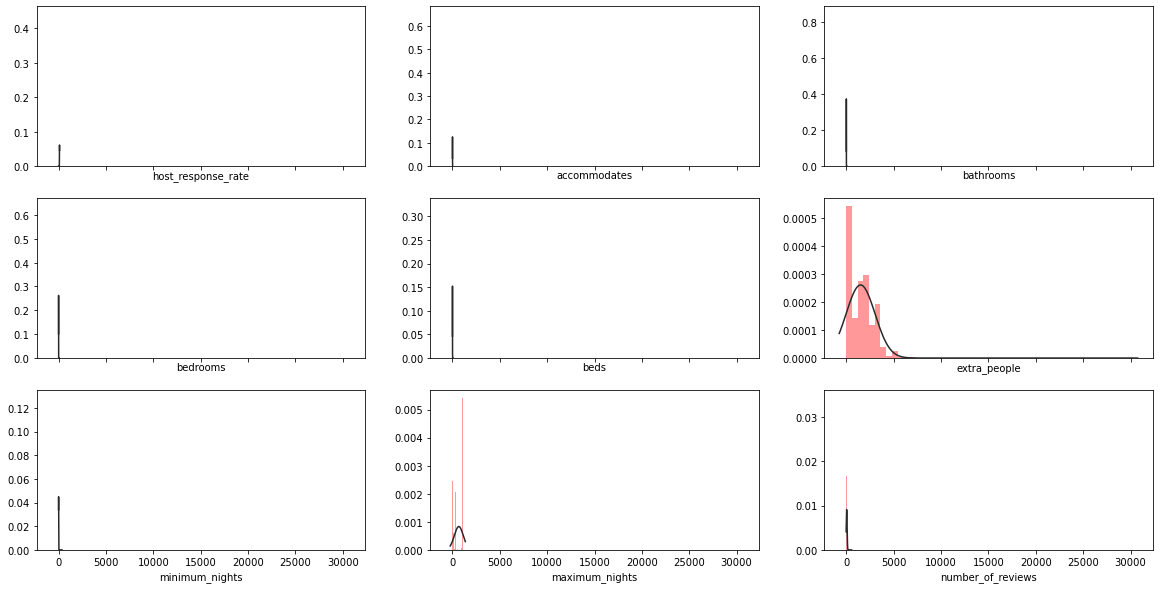

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# melihat distribusi data
f, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True)
a = 0
b = 0
for x in  numerical:
    sns.distplot(data[x], fit = norm, label="normal distribution", kde=False, color="r", ax=axes[a, b])
    b+=1
    if b>2:
        b=0
        a+=1

Distribusi data-data kurang terlihat jelas dan juga karena range data berbeda-beda sehingga perlu dilakukan scaling

In [49]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler()
data[['host_response_rate',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']] = scaler.fit_transform(data[numerical])

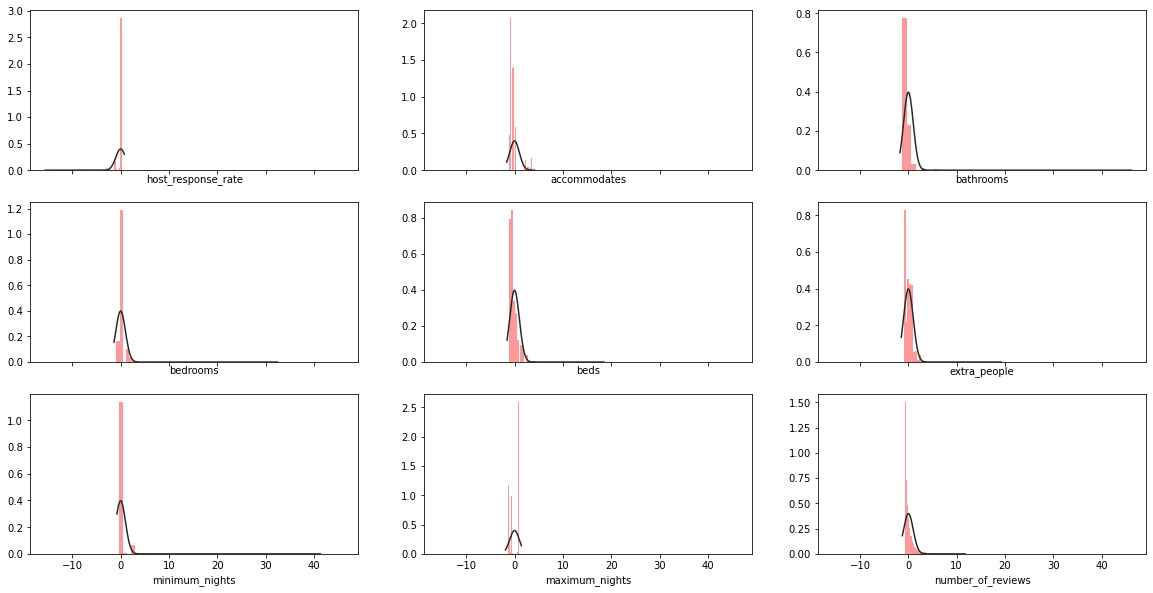

In [50]:
# melihat distribusi data
f, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True)
a = 0
b = 0
for x in  numerical:
    sns.distplot(data[x], fit = norm, label="normal distribution", kde=False, color="r", ax=axes[a, b])
    b+=1
    if b>2:
        b=0
        a+=1

Setelah dilakukan scaling menggunakan standard scaler distribusi terlihat lebih jelas walaupun distribusi-distribusi tersebut tidak semuanya mirip dengan gaussian distribution.

# Split data

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    data.loc[:,:'number_of_reviews'], 
    data['review_scores_rating'],test_size=0.2,shuffle = True,random_state=10)

In [52]:
count_category = pd.value_counts(y_train,sort = True)
print(count_category)

1    5961
0     879
Name: review_scores_rating, dtype: int64


# Lakukan Undersampling dan Oversampling

Melakukan undersampling dan oversampling karena data train kita tidak balance

In [53]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
# rus = RandomUnderSampler()
tl = TomekLinks()

In [54]:
x_train, y_train = tl.fit_resample(x_train,y_train)

In [55]:
count_category = pd.value_counts(y_train,sort = True)
print(count_category)

1    5744
0     879
Name: review_scores_rating, dtype: int64


Setelah melakukan undersampling dengan algoritma Tomek Links ternyata masih imbalance sehingga saya akan melakukan oversampling terhadap class minor dengan algoritma SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = {0: 1500})
x_train, y_train = sm.fit_resample(x_train,y_train)

saya akan buat class 0 hingga memiliki 1500 supaya data sintesis atau palsu tidak lebih banyak dari data aslinya.

In [57]:
count_category = pd.value_counts(y_train,sort = True)
print(count_category)

1    5744
0    1500
Name: review_scores_rating, dtype: int64


# Feature Selection untuk data yang akan digunakan untuk mengklasifikasi review_scores_rating

### Menggunakan Spearman Correlation untuk menyeleksi fitur numerik mana yang akan dipakai
Memilih data yang hasil p-value ny lebih kecil dari 0.05 dan koefisien spearman lebih besar dari 0.05 dan lebih kecil dari -0.05 dimana kalau koefisien korelasi ny semakin positif artinya data target akan sebanding dengan fitur sementara jika semakin negatif koefisien korelasinya maka akan berbanding terbalik dengan data target. Sementara itu p - value dipakai untuk mengindikasi kan bahwa peluang untuk mendapatkan hasil yang setidaknya sama ekstrim dengan variabel yang diamati. Jika p value makin kecil maka mengindikasikan bahwa nilai ekstrim tersebut dapat muncul tetapi kemungkinan ny kecil. 

In [58]:
numerical_selected = []
print("Data numerical yang akan dipilih menjadi fitur:")
print("===============================================")
for i,x in enumerate(numerical):
    coeff , p_val = stats.spearmanr(x_train[x],y_train)
    if (coeff > 0.05 or coeff < -0.05) and (p_val<=0.05):
        print(x)
        print('coef: {}, p_val : {}'.format(coeff,p_val))
        numerical_selected.append(x)
        print()

Data numerical yang akan dipilih menjadi fitur:
accommodates
coef: 0.11630642620348125, p_val : 3.0503557492032363e-23

bedrooms
coef: 0.08314397759455447, p_val : 1.3648011972024518e-12

beds
coef: 0.10849393363353128, p_val : 2.0471501224415622e-20

extra_people
coef: 0.1276343665990038, p_val : 1.0798168627518423e-27

minimum_nights
coef: 0.11994365852921, p_val : 1.2612169746231789e-24

number_of_reviews
coef: 0.1857521879060252, p_val : 3.041495692779493e-57



### Menggunakan Chi Square test untuk menyeleksi fitur categorical mana yang akan dipakai

Test ini cocok untuk data kategori karena dihitung berdasarkan frekuensi nya.

Memilih data yang hasil p-value ny lebih kecil dari 0.05. p - value dipakai untuk mengindikasi kan bahwa peluang untuk mendapatkan hasil yang setidaknya sama ekstrim dengan variabel yang diamati. Jika p value makin kecil maka mengindikasikan bahwa nilai ekstrim tersebut dapat muncul tetapi kemungkinan ny kecil. 

In [59]:
from sklearn.feature_selection import chi2

chi2, p_val = chi2(x_train[categorical], y_train)

In [60]:
p_val

array([9.57968174e-02, 5.46533135e-13, 2.94099631e-41])

In [61]:
list_of_index = []
for i,x in enumerate(p_val):
    if x<=0.05:
        list_of_index.append(i)

In [62]:
categorical_selected = []
print("Data categorical yang akan dipilih menjadi fitur:")
print("===============================================")
for i,x in enumerate(categorical):
    if i in list_of_index:
        print(x)
        categorical_selected.append(x)

Data categorical yang akan dipilih menjadi fitur:
neighbourhood
property_type


In [63]:
selected_features = []
for x in numerical_selected:
    selected_features.append(x)

for x in categorical_selected:
    selected_features.append(x)

In [64]:
selected_features

['accommodates',
 'bedrooms',
 'beds',
 'extra_people',
 'minimum_nights',
 'number_of_reviews',
 'neighbourhood',
 'property_type']

In [65]:
x_train

,host_response_time,host_response_rate,neighbourhood,property_type,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,number_of_reviews
0,3,0.265481,5,1,0.457419,-0.301514,-0.231654,0.477061,-0.001097,-0.264767,-0.635432,-0.336532
1,2,0.265481,5,1,-0.797896,-0.301514,-0.889675,-0.285916,-0.985562,-0.264767,-1.334781,-0.427565
2,3,0.265481,26,1,-0.484067,-0.301514,-0.231654,-0.285916,0.327058,-0.151873,-1.188648,-0.518598
3,3,0.265481,31,1,-0.170238,-0.301514,-0.231654,-0.285916,-0.281341,-0.151873,0.951152,2.212392
4,3,-0.196405,33,1,-0.484067,-0.301514,-0.231654,-0.285916,-0.591776,0.186811,-0.635432,-0.655148
...,...,...,...,...,...,...,...,...,...,...,...,...
7239,3,0.265481,31,1,0.360867,-0.301514,-0.231654,-0.916832,0.327058,-0.225686,0.949787,-0.022309
7240,1,-2.050331,13,1,-0.658560,-0.301514,-0.231654,-0.483782,-0.669660,-0.264767,0.951152,-0.723422
7241,3,0.265481,13,1,-0.797896,-0.301514,-0.231654,-0.428743,-0.985562,-0.264767,-0.645870,-0.723422
7242,3,0.265481,13,1,-0.797896,-0.301514,-0.231654,-0.589099,-0.985562,-0.264767,-0.645870,-0.669162


In [66]:
new_x_train = x_train[selected_features]
new_x_test = x_test[selected_features]

In [67]:
frames = [new_x_train,new_x_test]

train_test_union =  pd.concat(frames)

# One Hot Encode

Melakukan one hot encoding karena category yang di label encode tidak menampilkan tingkatan sehingga harus di one hot encode. Jika kita tidak melakukan one hot encoding maka model akan salah mengartikan label karena label dari label encoder merupakan angka 0 - (n-1) sehingga dapat diartikan sebagai tingkatan atau bobot jika tidak di one hot encode.

In [68]:
one_hot = preprocessing.OneHotEncoder(sparse = False) 
for x in categorical_selected:
    res = one_hot.fit_transform(train_test_union[[x]]).astype(int)
    for i in range(res.shape[1]):
        column_name = x + str(i)
        train_test_union.insert(len(train_test_union.columns), column_name, res.T[i])
    train_test_union.drop(x, axis = 1,inplace = True)

In [69]:
new_x_train = train_test_union.iloc[0:new_x_train.shape[0],:]
new_x_train.reset_index(drop = True,inplace = True)
new_x_test = train_test_union.iloc[new_x_train.shape[0]:,:]
new_x_test.reset_index(drop=True,inplace = True)

In [70]:
new_x_train

,accommodates,bedrooms,beds,extra_people,minimum_nights,number_of_reviews,neighbourhood0,neighbourhood1,neighbourhood2,neighbourhood3,...,property_type14,property_type15,property_type16,property_type17,property_type18,property_type19,property_type20,property_type21,property_type22,property_type23
0,0.457419,-0.231654,0.477061,-0.001097,-0.264767,-0.336532,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.797896,-0.889675,-0.285916,-0.985562,-0.264767,-0.427565,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.484067,-0.231654,-0.285916,0.327058,-0.151873,-0.518598,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.170238,-0.231654,-0.285916,-0.281341,-0.151873,2.212392,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.484067,-0.231654,-0.285916,-0.591776,0.186811,-0.655148,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,0.360867,-0.231654,-0.916832,0.327058,-0.225686,-0.022309,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7240,-0.658560,-0.231654,-0.483782,-0.669660,-0.264767,-0.723422,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7241,-0.797896,-0.231654,-0.428743,-0.985562,-0.264767,-0.723422,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7242,-0.797896,-0.231654,-0.589099,-0.985562,-0.264767,-0.669162,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(new_x_train, y_train)

pred_KNN = neigh.predict(new_x_test)

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


print('Akurasi KNN : {} %'.format(accuracy_score(y_test,pred_KNN)*100))

Akurasi KNN : 82.7485380116959 %


Saya memilih akurasi sebagai metrics karena akurasi mengukur seberapa tepat prediksi yang kita buat dengan data asli.

Performa dari algoritma KNN dalam mengklasifikasi Review cukup baik dibanding algoritma lain, tetapi masih kalah akurasinya dengan algoritma SVM. Hal tersebut dapat terjadi karena performa KNN tidak terlalu efektif jika data memiliki dimensi yang tinggi.

In [72]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=10)
svm_clf.fit(new_x_train, y_train)
pred_svm = svm_clf.predict(new_x_test)

print('Akurasi SVM : {} %'.format(accuracy_score(y_test,pred_svm)*100))

Akurasi SVM : 86.0233918128655 %


Saya memilih akurasi sebagai metrics karena akurasi mengukur seberapa tepat prediksi yang kita buat dengan data asli.

Performa dari algoritma SVM dalam mengklasifikasi Review merupakan yang paling baik diantara algoritma lain, hal ini terjadi karena SVM memunyai performa yang lebih baik dibanding algoritma lain jika dilakukan pada data yang memiliki dimensi yang tinggi. Data yang kita pakai kali ini mampunyai dimensi yang relatif tinggi (66 kolom) sehingga SVm dapat mencapai akurasi terbaik dibanding algoritma lain.

In [73]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(new_x_train, y_train)

pred_desicion_tree = decision_tree.predict(new_x_test)

print('Akurasi Decision Tree: {} %'.format(accuracy_score(y_test,pred_desicion_tree )*100))

Akurasi Decision Tree: 80.29239766081872 %


Saya memilih akurasi sebagai metrics karena akurasi mengukur seberapa tepat prediksi yang kita buat dengan data asli.

Performa dari algoritma Decision tree dalam mengklasifikasi Review merupakan yang plaing buruk diantara algoritma lain. Hal ini terjadi karena dimensi data yang besar dan juga kolom kategori yang di one hot encoding. Kolom kategori harus di one-hot encoding karena kolom kategori tidak menentukan tingkatan dari kategori tersebut jadi kita tidak bisa langsung hanya menggunakan label encoding untuk melakukan klasifikasi.

# Feature Extraction

Karena fitur kategori tadi kita lakukan one hot encoding sehingga menyebabkan banyak kolom pada data train, maka saya akan mereduksi dimensi nya dengan PCA hingga menjadi hanya 2 fitur saja. Saya mereduksi dimensi dengan PCA hingga menjadi hanya 2 fitur supaya dapat divisualisasi menjadi plot 2d.

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2).fit(new_x_train)

In [75]:
after_pca = pca.transform(new_x_train)

In [76]:
after_pca= pd.DataFrame(after_pca,columns=['pca1','pca2'])

# Gaussian Mixture Model

In [77]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2)
gmm.fit(after_pca)

GaussianMixture(n_components=2)

In [78]:
y_gmm = gmm.predict(after_pca)

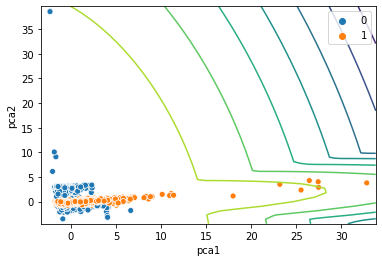

In [79]:
X, Y = np.meshgrid(np.linspace(after_pca['pca1'].min()-1,after_pca['pca1'].max()+1), 
                   np.linspace(after_pca['pca2'].min()-1,after_pca['pca2'].max()+1))

XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
sns.scatterplot(x="pca1", y="pca2", hue=y_gmm, data=after_pca)
plt.show()

## Cara Learning Gaussian Mixture Model menggunakan Expectation maximization (EM) :

1. E-step

   Hitung probabilitas posterior bahwa setiap gaussian menghasilkan titik data.

2. M-step

   Asumsi bahwa titik-titik data di generate dengan cara di atas, ubah parameter masing-masing gaussian untuk memaksimalkan  probabilitas bahwa gaussian-gaussian tersebut akan mengenerate data yang menjadi tanggung jawabnya (memiliki distribusi seperti dirinya).

# K-Means clustering

In [80]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(after_pca)

KMeans(n_clusters=2)

In [81]:
y_kmeans = kmeans.predict(after_pca)

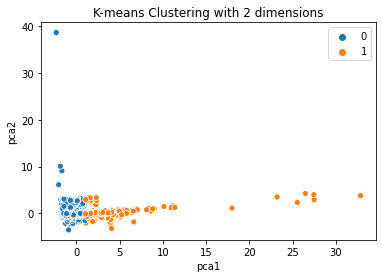

In [82]:
sns.scatterplot(x="pca1", y="pca2", hue=y_kmeans, data=after_pca)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### Cara kerja K-Means Clustering :

1. Pilih k titik acak sebagai pusat cluster
2. Assign data ke pusat cluster terdekat
3. Reset pusat cluster menjadi rata-rata titik di dalam clusternya masing-masing

Iterasi tahap 2 dan 3 sampai konvergen